In [2]:
# Show plots inline, and load main getdist plot and pyACC modules
import sys,os
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, cm
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
# Import distances class
from pyACC.cosmology import *
# Import integration class
from pyACC.Calculus import *
import scipy as sp
# Import the plotting module
from getdist import plots, MCSamples
import getdist

In [3]:
prob=lambda x,y: np.exp(-(x-1)**2)*np.exp(-(y-3)**6/2)
Prob=Funct(prob)
N=373
extrI=np.array([-N,-N]) # N for numerical porpouses
extrF=np.array([N,N])
norm=Prob.Int(extrI,extrF)
print('Normalization: ',norm)
PDF=lambda x,y: prob(x,y)/norm

Function object created, you've inserted a  <class 'function'>  function with  2  variables
Normalization:  3.6914178275556644


In [4]:
sigx=1
sigy=1
COV=np.diag([sigx,sigy])

x_0=0.5
y_0=0.5
X0=np.array([x_0,y_0])

Nint=100000

In [5]:
# gaussian proposal
result_MH,eff_MH=Metropolis_Hastings(PDF,X0,Nint,cov_mat=COV,type='gauss')
x_res=result_MH[:,0]
y_res=result_MH[:,1]

Function object created, you've inserted a  <class 'function'>  function with  2  variables


In [6]:
# flat proposal
Ds=np.array([0.1,0.2])
result_MH_lin,eff_MH_lin=Metropolis_Hastings(PDF,X0,Nint,Ds,type='flat')
x_res_lin=result_MH_lin[:,0]
y_res_lin=result_MH_lin[:,1]

Function object created, you've inserted a  <class 'function'>  function with  2  variables


In [7]:
xmin=-1.5
ymin=1
xmax=3
ymax=5

x=np.linspace(xmin,xmax,1000)
y=np.linspace(ymin,ymax,1000)
X,Y=np.meshgrid(x,y)

pdf=PDF(X,Y)

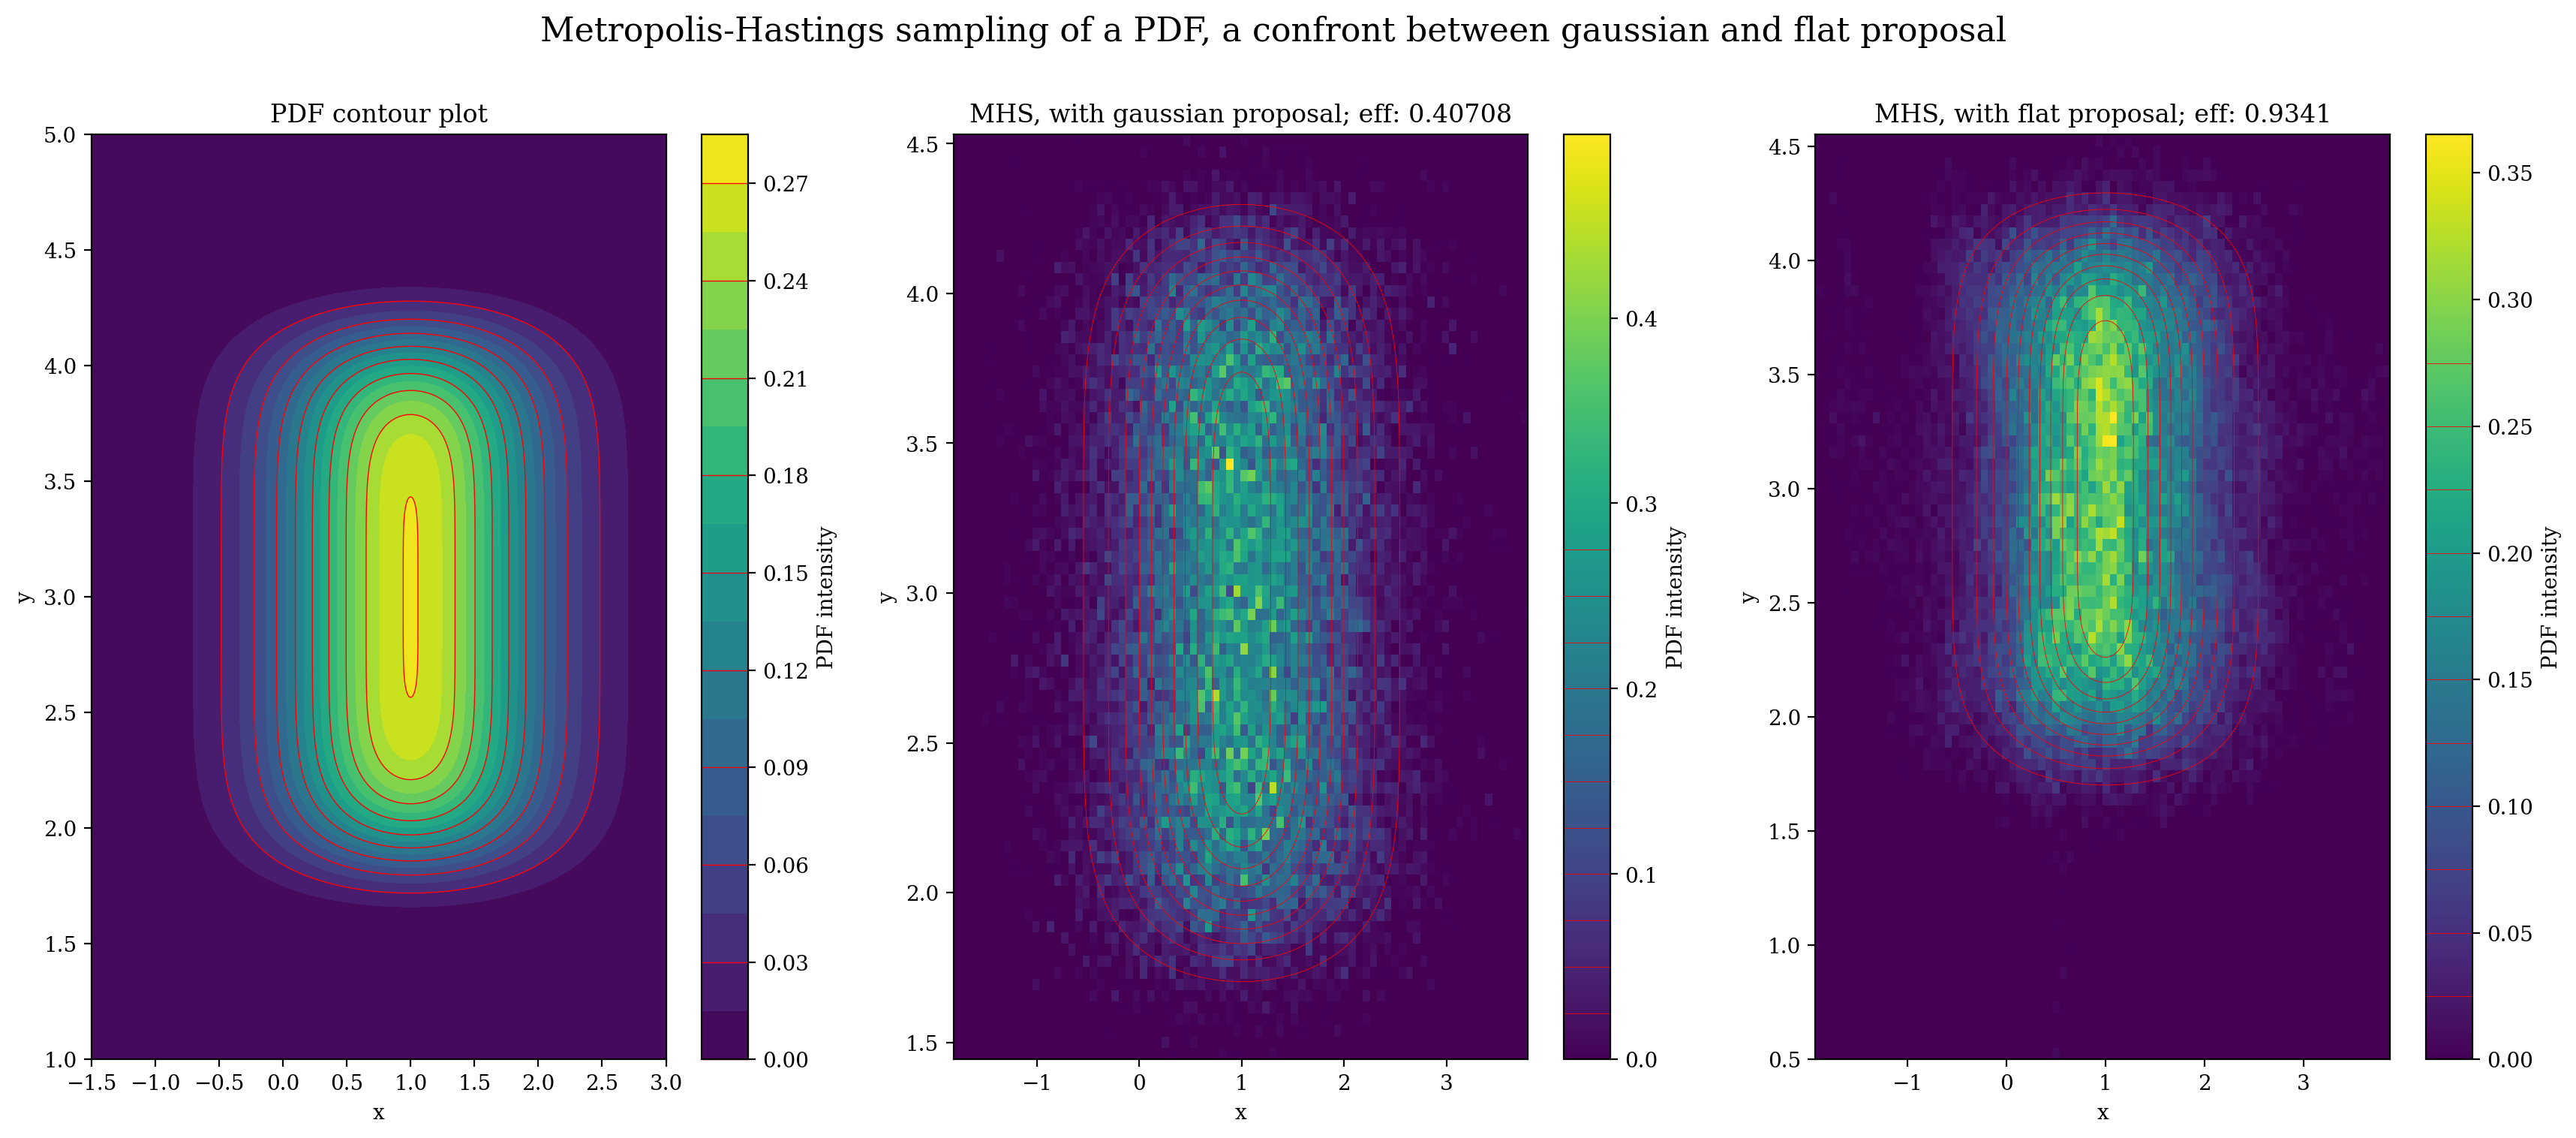

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21,8))
fig.suptitle('Metropolis-Hastings sampling of a PDF, a confront between gaussian and flat proposal', fontsize=16)
CS = ax1.contourf(X,Y,pdf, 20)
CS2 = ax1.contour(CS, levels=CS.levels[::2], colors='r',linewidths=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('PDF contour plot')
cbar = fig.colorbar(CS, ax=ax1)
cbar.ax.set_ylabel('PDF intensity')
cbar.add_lines(CS2)

counts,ybins,xbins,image =ax2.hist2d(x_res,y_res,bins=80,density=True);
hist_c= ax2.contour(X,Y,pdf, 10,colors='r',linewidths=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('MHS, with gaussian proposal; eff: '+str(eff_MH))
cbar2 = fig.colorbar(image, ax=ax2)
cbar2.ax.set_ylabel('PDF intensity')
cbar2.add_lines(hist_c)


counts2,ybins2,xbins2,image2 =ax3.hist2d(x_res_lin,y_res_lin,bins=80,density=True);
hist_c2= ax3.contour(X,Y,pdf, 10,colors='r',linewidths=0.3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('MHS, with flat proposal; eff: '+str(eff_MH_lin))
cbar3 = fig.colorbar(image2, ax=ax3)
cbar3.ax.set_ylabel('PDF intensity')
cbar3.add_lines(hist_c2)



Removed no burn in
Removed no burn in


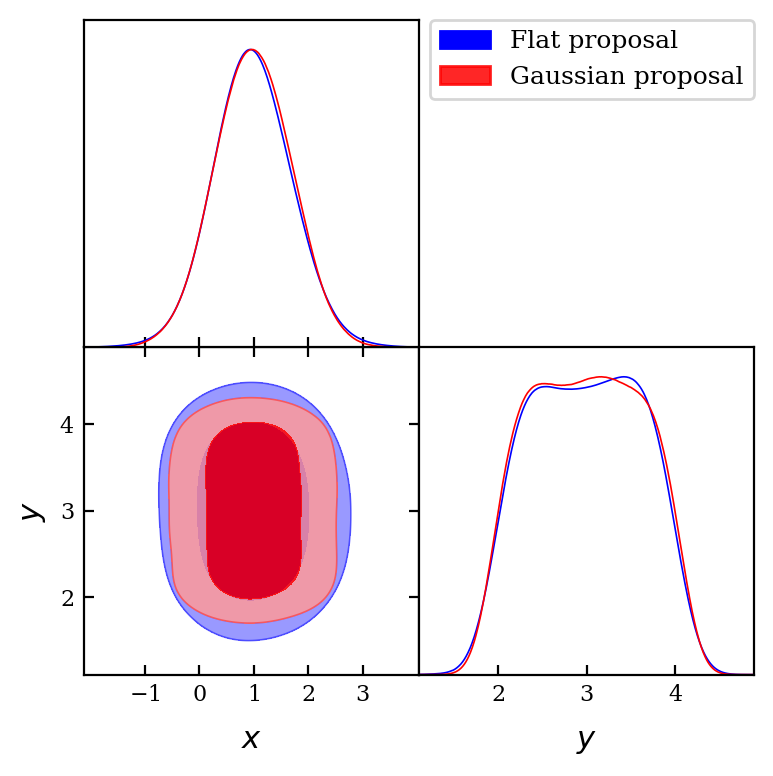

In [9]:

'''
margX=np.trapz(pdf,x,dx=1/x.size,axis=0)
margY=np.trapz(pdf,y,dx=1/y.size,axis=1)
'''

sam_lin=MCSamples(samples=result_MH_lin,names=['x','y'],labels=['x','y'],label='Flat proposal')
sam_gauss=MCSamples(samples=result_MH,names=['x','y'],labels=['x','y'],label='Gaussian proposal')
g = plots.get_subplot_plotter()
g.triangle_plot([sam_lin,sam_gauss], filled=True, contour_colors=['blue','red'],alpha=0.5)


In [13]:
print('----------------------------------')
print(' ')
print('Statistics info for flat proposal:')
print(' ')
print(sp.stats.describe(result_MH_lin))
print(' ')
print(' ')
print('----------------------------------')
print(' ')
print('Statistics info for gaussian proposal:')
print(' ')
print(sp.stats.describe(result_MH))
print(' ')
print('----------------------------------')

----------------------------------
 
Statistics info for flat proposal:
 
DescribeResult(nobs=100000, minmax=(array([-1.92496773,  0.5       ]), array([3.87171689, 4.55212317])), mean=array([0.98373115, 2.9959136 ]), variance=array([0.50919817, 0.40157878]), skewness=array([ 0.07694449, -0.01713865]), kurtosis=array([ 0.30447916, -1.00382809]))
 
 
----------------------------------
 
Statistics info for gaussian proposal:
 
DescribeResult(nobs=100000, minmax=(array([-1.81402435,  1.44271531]), array([3.79621273, 4.53007711])), mean=array([0.99382008, 2.99822517]), variance=array([0.49199383, 0.3989268 ]), skewness=array([0.00429598, 0.00707225]), kurtosis=array([-0.09746476, -0.99404214]))
 
----------------------------------
